# Appliances with occasional use

There are some appliances that are occasionally included in the mix of appliances that the user switches on during the day. For example, an iron, a stereo, printers, etc.

Within RAMP, the user may specify the probability of using an appliance on the daily mix with a parameter called **occasional_use**.

When `occasional_use = 1`, the appliance is always present in the mix, and when `occasional_use = 0`,  the appliance is never present. Any in-between values will lead to a probabilistic calculation to decide whether the appliance is used or not on a given day.

The following example investigates the effect of this parameter by modelling two user categories:
* A household that uses a computer occasionally
* A school that uses the computer every day

In [1]:
# importing functions
from ramp import User, UseCase
import matplotlib.pyplot as plt
import pandas as pd

### Creating user categories and appliances

In [2]:
household = User("Household")
school = User("School")

In [3]:
computer_0 = household.add_appliance(
    name="Household Computer",
    number=1,
    power=50,
    num_windows=1,
    func_time=210,  # 3.5 hours
    func_cycle=210,
    occasional_use=0.5,  # 50% chance of occasional use,
    window_1=[480, 750],  # start from 8AM
)

In [4]:
computer_1 = school.add_appliance(
    name="School Computer",
    number=1,
    power=50,
    num_windows=1,
    func_time=210,  # 3.5 hours
    func_cycle=210,
    occasional_use=1,  # always present in the mix of appliances,
    window_1=[480, 750],  # start from 8AM
)

### Generating profiles
As the profiles of each specific User category is important, we will use the User object profile genertor methods for 5 consecutive days:

In [5]:
number_of_days = 5
household_profiles = []
school_profiles = []

for day in range(1, number_of_days + 1):
    household_profiles.extend(household.generate_single_load_profile(prof_i=day))

    school_profiles.extend(school.generate_single_load_profile(prof_i=day))

You are generating ramp demand from a User not bounded to a UseCase instance, a default one has been created for you 
You are generating ramp demand from a User not bounded to a UseCase instance, a default one has been created for you 


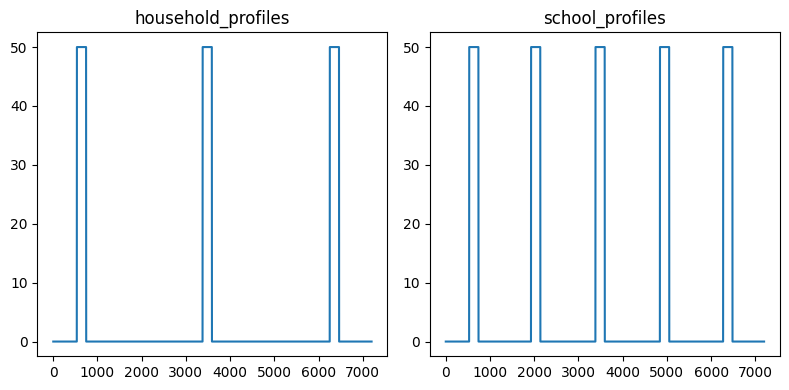

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


i = 0
for name, df in dict(
    household_profiles=pd.DataFrame(household_profiles),
    school_profiles=pd.DataFrame(school_profiles),
).items():
    df.plot(ax=axes[i], legend=False)
    axes[i].set_title(name)
    i += 1

plt.tight_layout()
plt.show()

As it can be seen from the figures, the computer is always present in
the school's appliance mix while, for the household, it is only occasionally 
present.